# GCCA Analysis NoteBook
### imports

In [1]:
import load_confounds as lc
from nilearn.input_data import NiftiMasker
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.plotting import plot_surf_stat_map
from sklearn.decomposition import PCA
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import subprocess

/home/yvonne/PycharmProjects/pythonProject/GCCA/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load Confounds

In [2]:
# load_confounds auto-detects the companion .tsv file (which needs to be in the same directory)
file = "data/sub-010042/ses-02/func/sub-010042_ses-02_task-rest_acq-AP_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
testImg= nib.load(file)
confounds = lc.Minimal().load(file)
print(testImg.shape)
print(testImg.get_data_dtype())
print(testImg.affine.shape)
hdr= testImg.header
print(hdr)
print(hdr.get_xyzt_units())

#Use the confounds to load preprocessed time series with nilearn
masker = NiftiMasker(smoothing_fwhm=5, standardize=True)
img = masker.fit_transform(file, confounds=confounds)

(85, 101, 85, 657)
int16
(4, 4)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  85 101  85 657   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    2.295 2.295 2.3   1.4   1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2326.8213
cal_min         : -157.56041
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.3.2).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d

In [3]:
# Transforming and reshaping the data after the Load confounds
img = img.T
img = img.astype(np.float32)
img = np.reshape(img, (85, 101, 85, 657))
new_image = nib.Nifti1Image(img,header=testImg.header,affine=testImg.affine)
new_image.header.set_data_dtype(np.float32)
# saving the new image in nii.gz file
newFileName= 'data/sub-010042/ses-02/func/sub-010042_ses-02_task-rest_acq-AP_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold_load_conf.nii.gz'
nib.save(new_image, newFileName)
checkImg= nib.load(newFileName)
print(checkImg.shape)
print(checkImg.get_data_dtype())
print(checkImg.affine.shape)
hdr= checkImg.header
print(hdr)
print(hdr.get_xyzt_units())


(85, 101, 85, 657)
float32
(4, 4)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  85 101  85 657   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    2.295 2.295 2.3   1.4   1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2326.8213
cal_min         : -157.56041
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.3.2).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quate

# In this Level we run the shell script to get the .mgz files
## (need to convert nii.gz image to time-series .npy files)
### the NoteBook doesn't include this level (you can look at the shell script file)

In [4]:
# #!/bin/bash
# #module load FreeSurfer/6.0.0
# #module load FSL
# export SUBJECTS_DIR=/opt/freesurfer/subjects
# declare -a subject=("010042")
# dir=/home/yvonne/PycharmProjects/pythonProject/GCCA/data
# for sub in "${subject[@]}"
# do for scan in _ses-02_task-rest_acq-AP_run-1 _ses-02_task-rest_acq-AP_run-2
# do for hemi in lh rh
# do mri_vol2surf --mov ${dir}/sub-"$sub"/ses-02/func/sub-"$sub"${scan}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz \
#   --mni152reg \
#   --projfrac-avg 0.2 0.8 0.1 \
#   --trgsubject fsaverage5 \
#   --interp nearest \
#   --hemi ${hemi} \
#   --surf-fwhm 12.0 --cortex --noreshape \
#   --o ${dir}/sub-"$sub"/ses-02/func/sub-"$sub"${scan}.fsa5.${hemi}.mgz
# done
# done
# done

# Creating the time-series Data



In [5]:
subName = ['_ses-02_task-rest_acq-AP_run-1', '_ses-02_task-rest_acq-AP_run-2']
for s in subName:
    filename = ('data/sub-010042/ses-02/func/sub-010042%s.fsa5.{}.mgz' % s) # where {} will be replaced with 'lh' and 'rh'
    timeseries = [None] * 2
    for i, h in enumerate(['lh', 'rh']):
        timeseries[i] = nib.load(filename.format(h)).get_fdata().squeeze()
    timeseries = np.vstack(timeseries)
    np.save(('timeseriesFiles/sub-010042%s_TS.npy' % s), timeseries)


## Creating a Color Bar

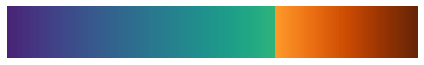

In [6]:
first = int((128 * 2) - np.round(255 * (1. - 0.65)))
second = (256 - first)
colors2 = plt.cm.viridis(np.linspace(0.1, .65, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.5, 1., second))
colors1 = plt.cm.viridis(np.linspace(0., .98, first))
colors4 = plt.cm.YlOrBr(np.linspace(0.3, 0.90, second))

cols1 = np.vstack((colors2, colors3))
cols2 = np.vstack((colors1, colors4))

mymap1 = colors.LinearSegmentedColormap.from_list('my_colormap1', cols1)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap1, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

## load surfaces and cortex label

In [7]:
surf_lh = nib.freesurfer.read_geometry('fsaverage5/surf/lh.inflated')
surf_rh = nib.freesurfer.read_geometry('fsaverage5/surf/rh.inflated')

cort_lh = nib.freesurfer.read_label('fsaverage5/label/lh.cortex.label')
cort_rh = nib.freesurfer.read_label('fsaverage5/label/rh.cortex.label')
cort = np.concatenate((cort_lh, cort_rh + 10242))

## Load Subject Time-series

In [8]:
data = []
subjs = ['010042']
for s in subjs:
    tmp = []
    tmp.append(np.load('timeseriesFiles/sub-%s_ses-02_task-rest_acq-AP_run-2_TS.npy' % s))
    # Removing The Zeros Values
    hcs_data_sum = np.array(tmp).sum(axis=0)
    hcs_data_sum_zeros = np.where(hcs_data_sum == 0)[0]
    print('The number of vertices with bad projection: {}\n'.format(sum(hcs_data_sum_zeros > 0)))
    unique_rows = np.unique(hcs_data_sum_zeros, axis=0)
    df = pd.DataFrame(tmp[0])
    df = df.drop(labels=hcs_data_sum_zeros, axis=0)
    tmp = np.array(df)
    data.append(tmp)
print(np.shape(data))

The number of vertices with bad projection: 1162233

(1, 18715, 657)


## Running PCA

In [9]:
pca = PCA()
pca.fit(np.mean(np.asarray(data), axis=0))
projs = pca.transform(np.mean(np.asarray(data), axis=0))
print(np.shape(projs))

(18715, 657)


## Set Visualization Parameters

In [10]:
n_comps = np.shape(projs)[1]
if n_comps > 5:  # set max number of components to show at 5
    n_comps = 5

n_subs = 1

n_views = 4  # number of brains to show per component
fig_width = 10

## Visualize Group-Level Average Components

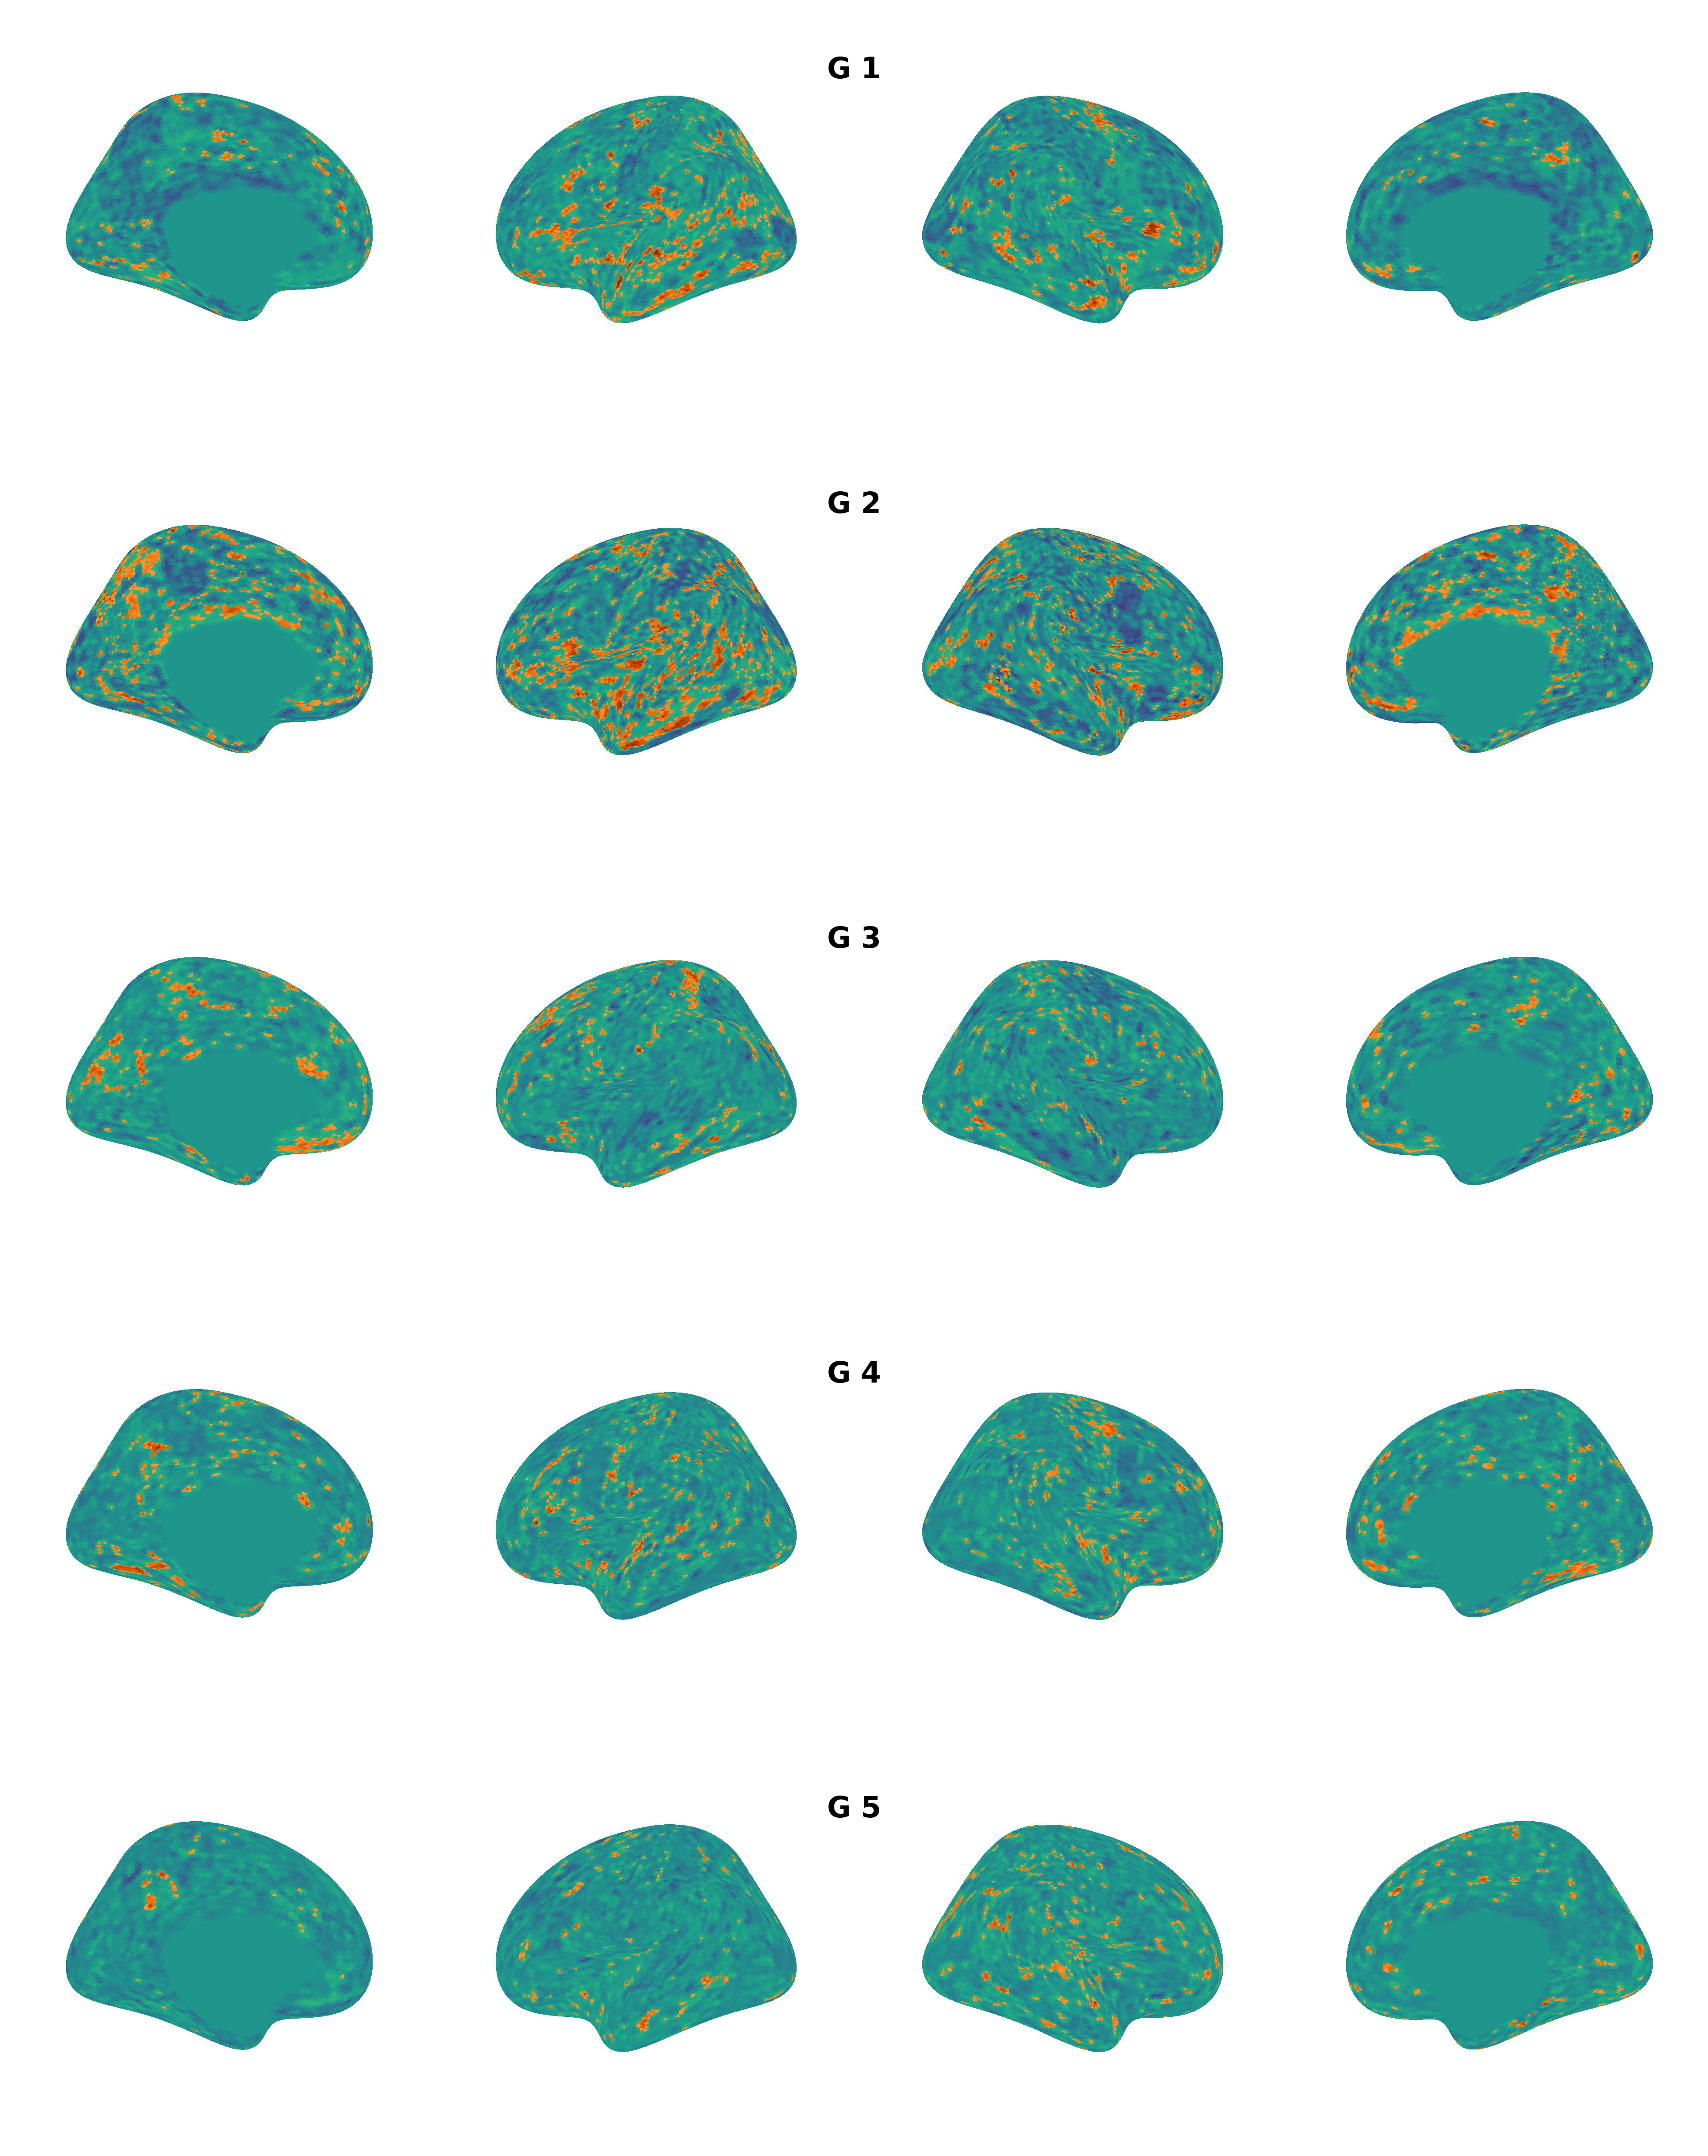

In [11]:
fig = plt.figure(figsize=(fig_width, fig_width * n_comps * 0.25), dpi=400)

for component in range(n_comps):
    ax1 = fig.add_subplot(n_comps, n_views, component * n_views + 1, projection='3d')
    ax2 = fig.add_subplot(n_comps, n_views, component * n_views + 2, projection='3d')
    ax3 = fig.add_subplot(n_comps, n_views, component * n_views + 3, projection='3d')
    ax4 = fig.add_subplot(n_comps, n_views, component * n_views + 4, projection='3d')
    res = np.zeros(10242)

    res[cort_lh]=np.asarray(projs)[:len(cort_lh):, component]
    plax1 = plot_surf_stat_map(surf_lh, res, hemi='left', view='medial', axes=ax1, colorbar=False, cmap=mymap1)
    plax2 = plot_surf_stat_map(surf_lh, res, hemi='left', view='lateral', axes=ax2, colorbar=False, cmap=mymap1)
    res = np.zeros(10242)
    res[cort_rh]=np.asarray(projs)[len(cort_lh):, component]

    plax3 = plot_surf_stat_map(surf_rh, res, hemi='right', view='lateral', axes=ax3, colorbar=False, cmap=mymap1)
    plax4 = plot_surf_stat_map(surf_rh, res, hemi='right', view='medial', axes=ax4, colorbar=False, cmap=mymap1)
    plt.figtext(0.5, 0.96 - (1. / n_comps) * component, 'G %i' % int(int(component) + 1),
                horizontalalignment='center', fontsize='large',fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.05)
filename = 'group.png'
plt.savefig(filename, dpi=400)
plt.show()

